In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
import math

# Etude de l'ECG Mono

## Question 1

In [2]:
#Les signaux ont le même nombre d'échantillons N
N = 4096
ecg1 = np.loadtxt('ecgmono1.dat')[0:N]
ecg2 = np.loadtxt('ecgmono2.dat')[0:N]
ecg3 = np.loadtxt('ecgmono3.dat')[0:N]
ecg4 = np.loadtxt('ecgmono4.dat')[0:N]

On visualise les échantillons des électrocardiogrammes.

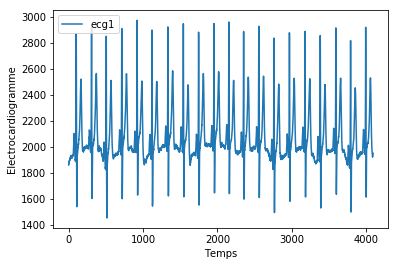

In [3]:
#Visualisation des N échantillons des électrocardiogrammes
plt.xlabel('Temps')
plt.ylabel('Electrocardiogramme')

#N = len(ecg1) = 4991
t = [i for i in range(0,N)]

plt.plot(t, ecg1)
#plt.plot(t, ecg2)
#plt.plot(t, ecg3)
#plt.plot(t, ecg4)

plt.legend(['ecg1', 'ecg2', 'ecg3', 'ecg4'])
plt.show()

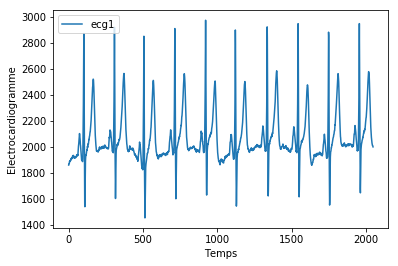

In [4]:
#Visualisation des N/2 échantillons des électrocardiogrammes
plt.xlabel('Temps')
plt.ylabel('Electrocardiogramme')

t = [i for i in range(0,N/2)]

plt.plot(t, ecg1[0:N/2])
#plt.plot(t, ecg2[0:N/2])
#plt.plot(t, ecg3[0:N/2])
#plt.plot(t, ecg4[0:N/2])

plt.legend(['ecg1', 'ecg2', 'ecg3', 'ecg4'])
plt.show()

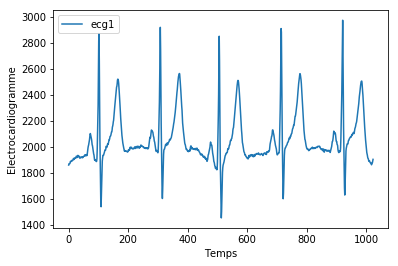

In [5]:
#Visualisation des N/4 échantillons des électrocardiogrammes
plt.xlabel('Temps')
plt.ylabel('Electrocardiogramme')

t = [i for i in range(0,N/4)]

plt.plot(t, ecg1[0:N/4])
#plt.plot(t, ecg2[0:N/4])
#plt.plot(t, ecg3[0:N/4])
#plt.plot(t, ecg4[0:N/4])

plt.legend(['ecg1', 'ecg2', 'ecg3', 'ecg4'])
plt.show()

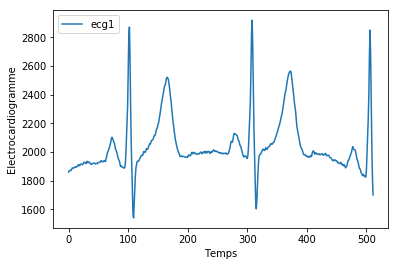

In [6]:
#Visualisation des N/8 échantillons des électrocardiogrammes
plt.xlabel('Temps')
plt.ylabel('Electrocardiogramme')

t = [i for i in range(0,N/8)]

plt.plot(t, ecg1[0:N/8])
#plt.plot(t, ecg2[0:N/8])
#plt.plot(t, ecg3[0:N/8])
#plt.plot(t, ecg4[0:N/8])

plt.legend(['ecg1', 'ecg2', 'ecg3', 'ecg4'])
plt.show()

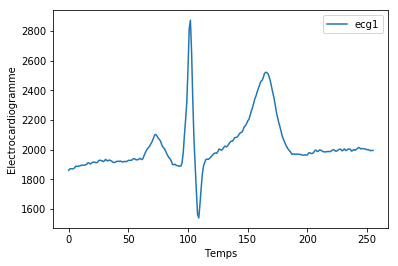

In [7]:
#Visualisation des N/16 échantillons des électrocardiogrammes
plt.xlabel('Temps')
plt.ylabel('Electrocardiogramme')

t = [i for i in range(0,N/16)]

plt.plot(t, ecg1[0:N/16])
#plt.plot(t, ecg2[0:N/16])
#plt.plot(t, ecg3[0:N/16])
#plt.plot(t, ecg4[0:N/16])

plt.legend(['ecg1', 'ecg2', 'ecg3', 'ecg4'])
plt.show()

Pour le premier électrocardiogramme, on estime le rythme cardiaque à 210Te secondes, où Te est la période d'échantillonage (inconnue).

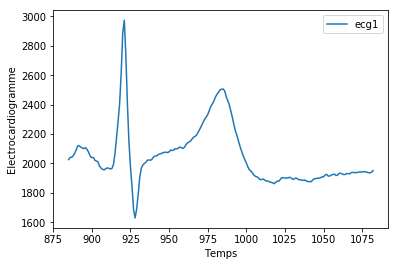

204


In [8]:
#Estimation rythme cardiaque du 1er electrocardiogramme
#1er motif (270-60).Te = 210.Te où Te := période d'échantillonage
#2ème : 470-270
#3ème : 678-470
#4ème : 885 - 678
#5ème : 1083 - 885
plt.xlabel('Temps')
plt.ylabel('Electrocardiogramme')

t = [i for i in range(885,1083)]

plt.plot(t, ecg1[885:1083])
#plt.plot(t, ecg2[0:N/16])
#plt.plot(t, ecg3[0:N/16])
#plt.plot(t, ecg4[0:N/16])

plt.legend(['ecg1', 'ecg2', 'ecg3', 'ecg4'])
plt.show()

mean = (270-60 + 470-270 + 678-470 + 885 - 678 + 1083 - 885)/5
print(mean)

On visualise maintenant le logarithme de l'amplitude de la transformée de Fourier discrète de chaque enregistrement.

[8430316.            +0.j          -37684.72788769-18076.89176197j
   15464.85330544  -328.21172634j ...  -15306.73240582 +3383.15396304j
   15464.85330544  +328.21172634j  -37684.72788769+18076.89176197j]
[8430316.           41796.08512461   15468.33574422 ...   15676.1534721
   15468.33574422   41796.08512461]


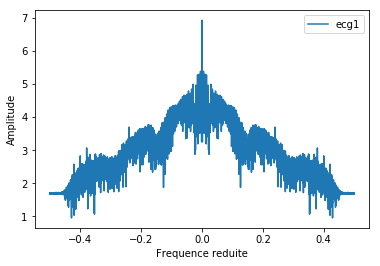

In [9]:
#Visualisation de la transformée de Fourier discrète (N échantillons de la TFTD)
plt.xlabel('Frequence reduite')
plt.ylabel('Amplitude')

#Attention si N != 4096, fft rajoute des zéros jusqu'à la prochaine puissance de 2 or N = 4991...
#Retourne des complexes et pas leur modules
fft1 = np.fft.fft(ecg1)
#fft2 = np.fft.fft(ecg2)
#fft3 = np.fft.fft(ecg3)
#fft4 = np.fft.fft(ecg4)
l1 = np.log10(np.absolute(fft1))[N/2:]
l2 = np.log10(np.absolute(fft1))[0:N/2]
l = np.concatenate((l1, l2))

f = np.linspace(-1/2.,1/2.,N)
plt.plot(f, l)
print(fft1)
print(np.absolute(fft1))
#plt.plot(f, np.log10(np.absolute(fft2)))
#plt.plot(f, np.log10(np.absolute(fft3)))
#plt.plot(f, np.log10(np.absolute(fft4)))

plt.legend(['ecg1', 'ecg2', 'ecg3', 'ecg4'])
plt.show()

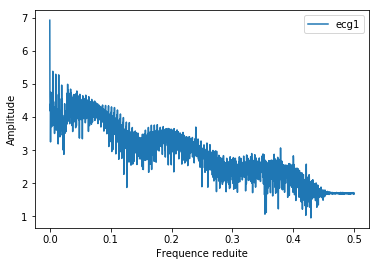

In [10]:
#Visualisation de la transformée de Fourier discrète (les N/2 derniers échantillons des N de la TFTD)
plt.xlabel('Frequence reduite')
plt.ylabel('Amplitude')

#Attention si N != 4096, fft rajoute des zéros jusqu'à la prochaine puissance de 2 or N = 4991...
#Retourne des complexes et pas leur modules
fft1 = np.fft.fft(ecg1)
#fft2 = np.fft.fft(ecg2)
#fft3 = np.fft.fft(ecg3)
#fft4 = np.fft.fft(ecg4)

f = np.linspace(0,1/2.,N/2)

plt.plot(f, np.log10(np.absolute(fft1[0:N/2])))
#plt.plot(f, np.log10(np.absolute(fft2[0:N/2])))
#plt.plot(f, np.log10(np.absolute(fft3[0:N/2]))
#plt.plot(f, np.log10(np.absolute(fft4[0:N/2])))

plt.legend(['ecg1', 'ecg2', 'ecg3', 'ecg4'])
plt.show()

## Question 2

La méthode temporelle que nous proposons est la simple estimation de la période de manière visuelle. En effet les signaux étant quasi-périodiques, après détection du motif il est simple de procéder à une telle estimation. Nous pourrions aussi chercher l'entier k maximisant l'autocorrélation du signal. La période sera alors k*Te.

## Question 3

Filtre passe-bas. On compare les réponses en fréquences et les signaux obtenus après filtrages de deux filtres différents. On applique la suite du traitement au signal obtenu par le second filtre.

    1. On essaie d'abord avec le filtre passe bas d'ordre 2 du cours, le résultat semble moins correspondre à ce qui était attendu (atténuation des hautes fréquences sans amplifier les plus basses) que ce qu'on obtient avec un filtre de Butterworth.
    2. On procède finalement avec un filtre de Butterworth: celui utilisé dans l'exemple de la doc de scipy.signal.lfilter.

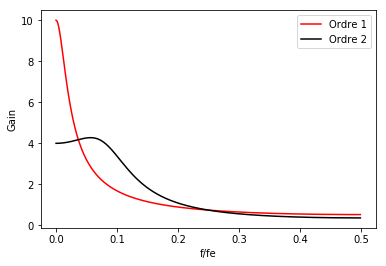

In [11]:
#Passe-bas d'ordre 1 + Plot la réponse impulsionnelle d'un filtre
b=[1]
a=[1,-0.9]
[freq,reponse] = signal.freqz(b,a)
plt.plot(freq/(2*math.pi),np.abs(reponse),'r')
plt.xlabel('f/fe')
plt.ylabel('Gain')
y2 = signal.lfilter([1],[1,-0.980],ecg1)
#Passe-bas d'ordre 2 du cours
b=[1]
a=[1,-1.25,0.5]
[freq,reponse] = signal.freqz(b,a)
plt.plot(freq/(2*math.pi),np.abs(reponse),'k')
plt.xlabel('f/fe')
plt.ylabel('Gain')
plt.legend(['Ordre 1','Ordre 2'])
y = signal.lfilter([1,-1.25,0.5],[1],ecg1)

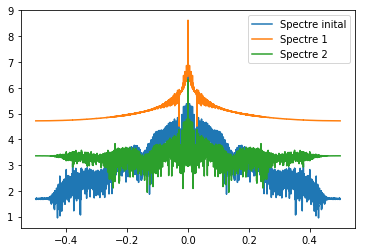

In [12]:
#Basses fréquences peu modifiées et hautes fréquences modifiées
f = np.linspace(-1/2.,1/2.,N)
l1 = np.log10(np.absolute(np.fft.fft(ecg1)))[0:N/2]
l2 = np.log10(np.absolute(np.fft.fft(ecg1)))[N/2:]
l = np.concatenate((l2,l1))

la = np.log10(np.absolute(np.fft.fft(y)))[0:N/2]
lb = np.log10(np.absolute(np.fft.fft(y)))[N/2:]
lc = np.concatenate((lb,la))

le = np.log10(np.absolute(np.fft.fft(y2)))[0:N/2]
ld = np.log10(np.absolute(np.fft.fft(y2)))[N/2:]
lf = np.concatenate((ld,le))

plt.plot(f, l)
plt.plot(f,lf)
plt.plot(f, lc)

plt.legend(['Spectre inital', 'Spectre 1', 'Spectre 2' ])

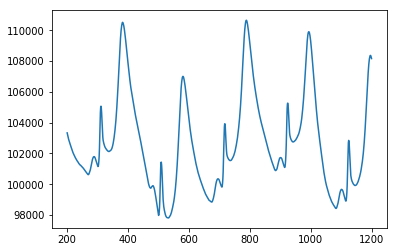

In [13]:
#En effet les basses fréquences sont modifiées (par exemple la moyenne du signal)
t = [i for i in range(200,1200)]
#plt.plot(t,ecg1[0:300])
plt.plot(t, y2[200:1200])
#plt.plot(t, y[200:1200])

Text(0,0.5,'Gain')

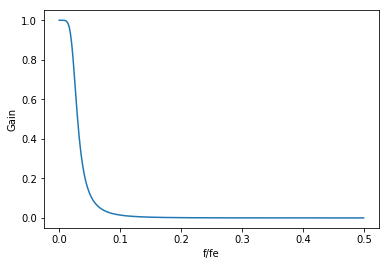

In [14]:
#Utilisation de filtre de Butterworth (cf. exemple de la documentation de scipy.signal.lfilter)
b, a = signal.butter(3, 0.05)
[freq,reponse] = signal.freqz(b,a)
plt.plot(freq/(2*math.pi),np.abs(reponse))
plt.xlabel('f/fe')
plt.ylabel('Gain')

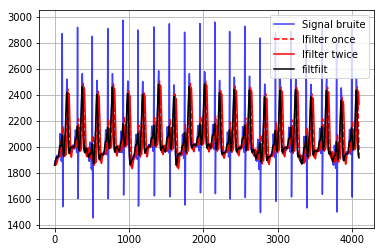

In [15]:
#Résultat plus satisfaisant
t = [i for i in range(0,N)]
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, ecg1, zi=zi*ecg1[0])
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
y = signal.filtfilt(b, a, ecg1)
plt.figure
plt.plot(t, ecg1, 'b', alpha=0.75)
plt.plot(t, z, 'r--', t, z2, 'r', t, y, 'k')
plt.legend(('Signal bruite', 'lfilter once', 'lfilter twice','filtfilt'), loc='best')
plt.grid(True)
plt.show()

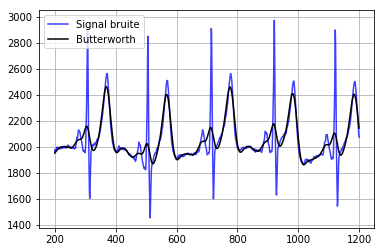

In [16]:
t = [i for i in range(200,1200)]
plt.figure
plt.plot(t, ecg1[200:1200], 'b', alpha=0.75)
plt.plot(t,y[200:1200], 'k')
plt.legend(('Signal bruite', 'Butterworth'), loc='best')
plt.grid(True)
plt.show()

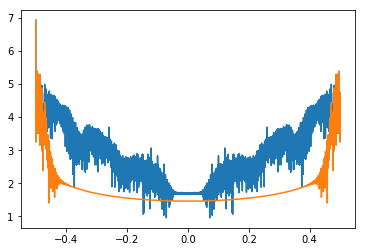

In [17]:
#Spectre lissé
plt.plot(f, np.log10(np.absolute(np.fft.fft(ecg1))))
plt.plot(f, np.log10(np.absolute(np.fft.fft(y))))

Redressement double alternance.

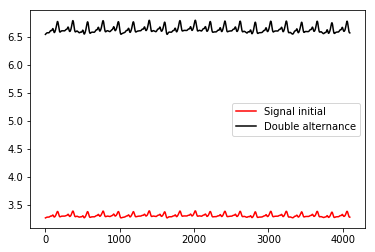

In [18]:
t = [i for i in range(0,N)]
plt.plot(t, np.log10(y),'r')
for i in range(0,len(y)):
    y[i] = y[i] * y[i]
plt.plot(t, np.log10(y),'k')
plt.legend(('Signal initial', 'Double alternance'))

Filtre RIF dérivateur.
    1. Nous remarquons que la multiplication dans le domaine des fréquences réduites par l'indicatrice de [-1/2,1/2] ne modifie pas le spectre d'un signal x: la convolution avec le sinus cardinal est le filtre identité. On peut alors dériver la relation (sinc * x) = x de part et d'autre, sachant que (f * g)' = f' * g. Ainsi pour obtenir la dérivée en sortie du filtre, il suffit de convoluer avec la dérivée du sinus cardinal. Concrètement, on évalue sa dérivée en les multiples de Te, la période d'échantillonage de l'électrocardiogramme étudié, et on applique la méthode de la fenêtre (de taille déterminée empiriquement) pour ne retenir qu'un nombre fini d'échantillons. Ne connaissant pas Te, on se contente d'évaluer la dérivée en les entiers
    
    
    2. Une autre possibilité consisterait à approximer la dérivée par la pente entre deux échantillons consécutifs: 
    $y[n] = (x[n] - x[n-1])/Te$ mais encore une fois on ne connaît pas $Te$.

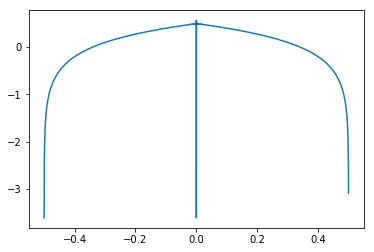

In [19]:
#Dérivée du sinus cardinal : (sinc t)' = (cos(pi*t)/t) - (sin(pi*t)/(pi*t^2)) si t non nul, 0 sinon
#On estime le filtre dérivateur par un filtre causal en prenant M échantillons autour de 0 de sinct' à période Te.
Te = 1
M = 2*N
h = [0 for k in range(0,M)]
for k in range(-M/2,M/2):
    if k==0:
        h[k]=0
    else:
        h[k]=(math.cos(math.pi*Te*k)/(Te*k)) - (math.sin(math.pi*Te*k)/(math.pi*(Te*k)**2))

#Visualisons la réponse en fréquence du filtre
f = np.linspace(-1/2.,1/2.,M)

plt.plot(f, np.log10(np.absolute(np.fft.fft(h))))

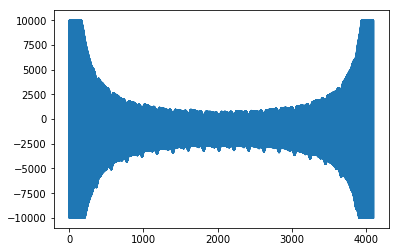

In [20]:
#Appliquons le filtre au signal déjà traité y
t = [i for i in range(0,N)]
yderivee1= np.convolve(h,y,'valid')[0:N]
yderivee2= np.convolve(h,ecg1,'valid')[0:N]
#plt.plot(t, y)
#plt.plot(t, np.log10(np.absolute(yderivee1)))
#print(yderivee1)
#plt.plot(t, yderivee2)
#plt.legend(['Butterworth', 'Signal initial'])
#Seuillage de pics
yseuil = yderivee1[0:N]
for i in range(0,N):
    if np.absolute(yderivee1[i])>10**4:
        if (yderivee1[i])>=0:
            yseuil[i] = 10**4
        else:
            yseuil[i] = -10**4
plt.plot(t, yseuil)


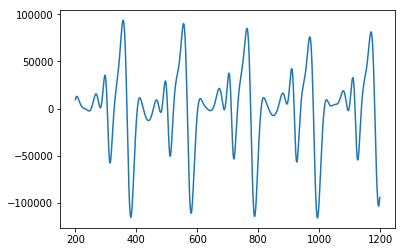

In [21]:
t = [i for i in range(0,N-1)]
yderivee3 = [0 for i in range(0,N-1)]
for i in range(0,N-1):
    yderivee3[i] = y[i+1] - y[i]

plt.plot(t[200:1200],yderivee3[200:1200])

## Séparation déterministe à partir des ECG mère-foetus

# Question 1

On écrit :

[y_A[n] y_A[n+1] ... y_A[n+L-1]]^T = [[y_T[n]     ... y_T[n-L+1]]  [h_1 ... h_L]^T + [x_F[n] ... x_F[n+L-1]]^T
                                      [y_T[n+1]   ... y_T[n-L+2]]
                                      [y_T[n+L-1] ... y_T[n]    ]]

ou encore en exploitant L échantillons consécutifs de y_T : 

y_A[n] = [y_T[n]     ... y_T[n-L+1] 1]  [h_1 ... h_L x_F[n]]^T

In [73]:
#Les signaux ont le même nombre d'échantillons (2500)
N = 2500
ecg = np.loadtxt('ecg2.dat')[0:N]
y_T = [ecg[i][0] for i in range(0,N)]
y_A = [ecg[i][1] for i in range(0,N)]

In [74]:
#Moindres carrés pour obtenir à partir de L échantillons consécutifs de y_T et l'échantillon présent de y_A, les L paramètres du filtre h et x_F[n]
L = 10 #ordre du filtre
x_F = [0] * (N - L) # pour estimer x_F[n], on a besoin des L échantillons précédents de y_T
h = [[0 for i in range(0,L)] for j in range(0,N-L)]
for n in range(0,N-L):
    b = [y_A[n]]
    a = [[y_T[n-i] for i in range(0,L)]]
    a[0].append(1)
    lst_sqr = np.linalg.lstsq(a,b)
    x_F[n] = lst_sqr[0][L]
    h[n] = lst_sqr[0][0:L]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if __name__ == '__main__':


In [75]:
#Moindres carrés pour obtenir à partir de L échantillons consécutifs de y_T et l'échantillon présent de y_A, les L paramètres du filtre h et x_F[n]
L = 5 #ordre du filtre
x_F2 = [0] * (N - L) # pour estimer x_F[n], on a besoin des L échantillons précédents de y_T
h2 = [[0 for i in range(0,L)] for j in range(0,N-L)]
for n in range(0,N-L):
    b = [y_A[n]]
    a = [[y_T[n-i] for i in range(0,L)]]
    lst_sqr = np.linalg.lstsq(a,b)
    diff = b[0]
    for k in range(0,L):
        diff -= lst_sqr[0][k]*a[0][k]
    x_F2[n] = diff
    h2[n] = lst_sqr[0][0:L]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


In [76]:
#Moindres carrés pour obtenir à partir de L échantillons consécutifs de y_T et l'échantillon présent de y_A, les L paramètres du filtre h et x_F[n]
L = 5 #ordre du filtre
K = (N-L)
x_F2 = [0] * (N - L) # pour estimer x_F[n], on a besoin des L échantillons précédents de y_T
h2 = [[0 for i in range(0,L)] for j in range(0,(N-L)/K)]
for n in range(0,(N-L)/K):
    b = []
    a = []
    for k in range(0,K):
        b.append(y_A[n+k])
        a.append([y_T[n-i+k] for i in range(0,L)])
    lst_sqr = np.linalg.lstsq(a,b)
    for k in range(0,K):
        diff = b[k]
        for j in range(0,L):
            diff -= lst_sqr[0][j]*a[k][j]
        x_F2[n*K+k] = diff
    h2[n] = lst_sqr[0][0:L]

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


In [77]:
#Regardons quels sont en moyenne les coefficients du filtre obtenus ainsi que la variance
h_mean = [0] * L
for i in range(0,L):
    for j in range(0,N-L):
        h_mean[i]+=h[j][i]
    h_mean[i] = h_mean[i] / (N-L)

print(h_mean)

h_var = [0] * L
for i in range(0,L):
    for j in range(0,N-L):
        h_var[i]+=(h[j][i] - h_mean[i])**2
    h_var[i] = h_var[i] / (N-L-1)

print(h_var)

IndexError: list index out of range

In [78]:
#Regardons quels sont en moyenne les coefficients du filtre obtenus ainsi que la variance
h_mean2 = [0] * L
for i in range(0,L):
    for j in range(0,N-L):
        h_mean2[i]+=h2[j][i]
    h_mean2[i] = h_mean2[i] / (N-L)

print(h_mean2)

h_var2 = [0] * L
for i in range(0,L):
    for j in range(0,N-L):
        h_var2[i]+=(h2[j][i] - h_mean2[i])**2
    h_var2[i] = h_var2[i] / (N-L-1)

print(h_var2)

IndexError: list index out of range

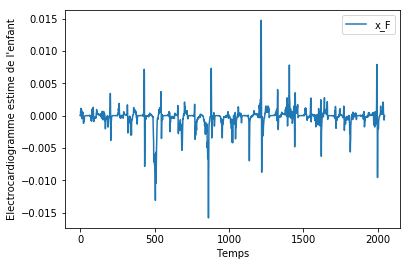

In [79]:
#Visualisation de la puissance de 2 la plus proche des N-L échantillons du signal obtenu
N = 2048
x_F = x_F[0:N]

plt.xlabel('Temps')
plt.ylabel('Electrocardiogramme estime de l\'enfant')

t = [i for i in range(0,N)]

plt.plot(t, x_F)

plt.legend(['x_F'])
plt.show()

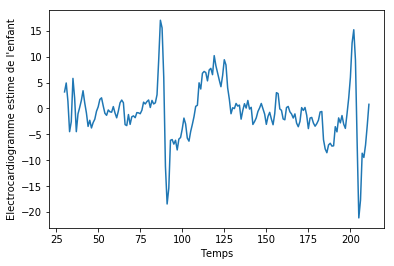

In [80]:
#Visualisation de la puissance de 2 la plus proche des N-L échantillons du signal obtenu
N = len(x_F2)
x_F2 = x_F2[0:N]
# apparition du motif : 556 - 728; 388 - 556; 212-388; 30 - 212

plt.xlabel('Temps')
plt.ylabel('Electrocardiogramme estime de l\'enfant')
I = 30
J = 212
t = [i for i in range(I,J)]

plt.plot(t, x_F2[I:J])

plt.show()

[-0.4409638 +0.j          0.11680631+0.36084139j -0.01069027-0.30074794j
 ...  0.15037958+0.05352018j -0.01069027+0.30074794j
  0.11680631-0.36084139j]
[0.4409638  0.37927592 0.30093787 ... 0.15961964 0.30093787 0.37927592]


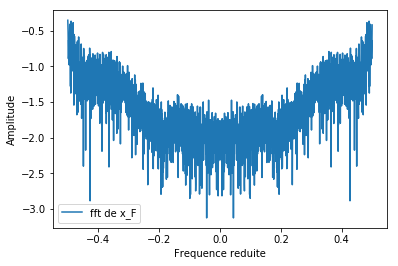

In [81]:
#Visualisation de la transformée de Fourier discrète (N échantillons de la TFTD)
plt.xlabel('Frequence reduite')
plt.ylabel('Amplitude')

N = len(x_F)
fft = np.fft.fft(x_F)

f = np.linspace(-1/2.,1/2.,N)

plt.plot(f, np.log10(np.absolute(fft)))
print(fft)
print(np.absolute(fft))

plt.legend(['fft de x_F'])
plt.show()



[  -17.66361119   +0.j           396.20572697 +911.82421017j
  1050.25493909 -353.50593682j ... -1163.33128964-1036.73606556j
  1050.25493909 +353.50593682j   396.20572697 -911.82421017j]
[  17.66361119  994.18427283 1108.15246445 ... 1558.25587086 1108.15246445
  994.18427283]


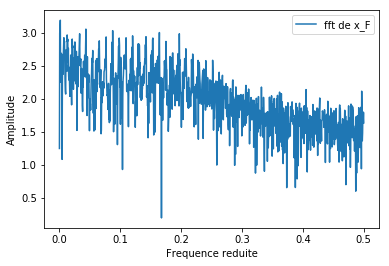

In [82]:
#Visualisation de la transformée de Fourier discrète (N échantillons de la TFTD)
plt.xlabel('Frequence reduite')
plt.ylabel('Amplitude')


fft = np.fft.fft(x_F2)

f = np.linspace(0,1/2.,N/2)

plt.plot(f, np.log10(np.absolute(fft))[0:N/2])
print(fft)
print(np.absolute(fft))

plt.legend(['fft de x_F'])
plt.show()


Text(0,0.5,'Gain')

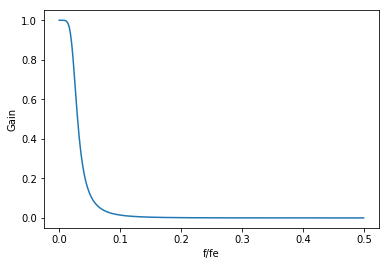

In [83]:
#Utilisation de filtre de Butterworth (cf. exemple de la documentation de scipy.signal.lfilter)
b, a = signal.butter(3, 0.05)
[freq,reponse] = signal.freqz(b,a)
plt.plot(freq/(2*math.pi),np.abs(reponse))
plt.xlabel('f/fe')
plt.ylabel('Gain')

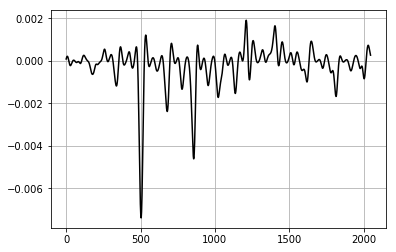

In [84]:
zi = signal.lfilter_zi(b, a)
z, _ = signal.lfilter(b, a, x_F, zi=zi*x_F[0])
z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
y = signal.filtfilt(b, a, x_F)
plt.figure
#plt.plot(t, x_F2, 'b', alpha=0.75)
plt.plot(y, 'k')
#plt.legend(('Signal bruite', 'lfilter once', 'lfilter twice','filtfilt'), loc='best')
plt.grid(True)
plt.show()

ValueError: x and y must have same first dimension, but have shapes (1024,) and (2048,)

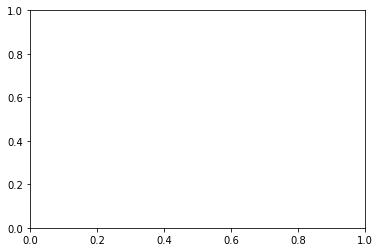

In [85]:
#Spectre lissé
plt.plot(f, np.log10(np.absolute(np.fft.fft(x_F))))
plt.plot(f, np.log10(np.absolute(np.fft.fft(y))))

ValueError: x and y must have same first dimension, but have shapes (182,) and (2048,)

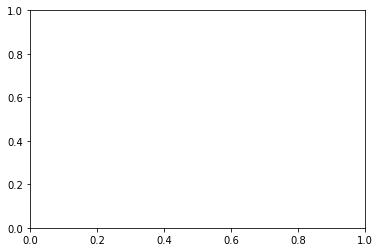

In [70]:
#redressement double alternance
for i in range(0,len(y)):
    y[i] = y[i] * y[i]

plt.plot(t, np.log10(y),'k')
plt.legend(('Signal initial', 'Double alternance'))

Text(0,0.5,'Gain (dB)')

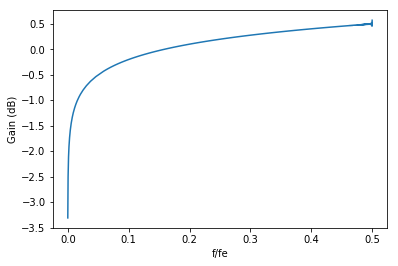

In [71]:
#Dérivée du sinus cardinal : (sinc t)' = (cos(pi*t)/t) - (sin(pi*t)/(pi*t^2)) si t non nul, 0 sinon
#On estime le filtre dérivateur par un filtre causal en prenant M échantillons autour de 0 de sinct' à période Te.
Te = 1
M = 2*N
h = [0 for k in range(0,M)]
for k in range(-M/2,M/2):
    if k==0:
        h[k]=0
    else:
        h[k]=(math.cos(math.pi*Te*k)/(Te*k)) - (math.sin(math.pi*Te*k)/(math.pi*(Te*k)**2))

#Visualisons la réponse en fréquence du filtre
f = np.linspace(0,1/2.,M/2)
plt.plot(f, np.log10(np.absolute(np.fft.fft(h)))[0:M/2])

plt.xlabel('f/fe')
plt.ylabel('Gain (dB)')

ValueError: x and y must have same first dimension, but have shapes (182,) and (2048,)

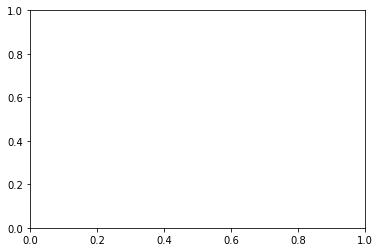

In [72]:
#Appliquons le filtre au signal déjà traité y
yderivee= np.convolve(h,y,'valid')
plt.plot(t, np.log10(y))
#Seuillage de pics
yseuil = yderivee